## compare results of finetuning AlexNet and VGG16


In [13]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import searchnets

In [14]:
results_dir = Path('../../../data/results/')
data_prep_dir = Path('../../../data/data_prepd_for_nets/')

In [15]:
test_csv_path = '../../../data/csv/alexnet_VGG16_finetune.csv'

In [8]:
searchnets.utils.general.results_csv(data_prep_dir,
                                     results_dir,
                                     test_csv_path=test_csv_path,
                                     nets=('alexnet', 'VGG16'),
                                     train_types=('finetune',),
                                     stims=('2_v_5', 'RVvGV', 'RVvRHGV'),
                                     target_condition=('present', 'absent', 'both'))

In [16]:
atft_df = pd.read_csv(test_csv_path)

In [17]:
pal = sns.color_palette('muted')

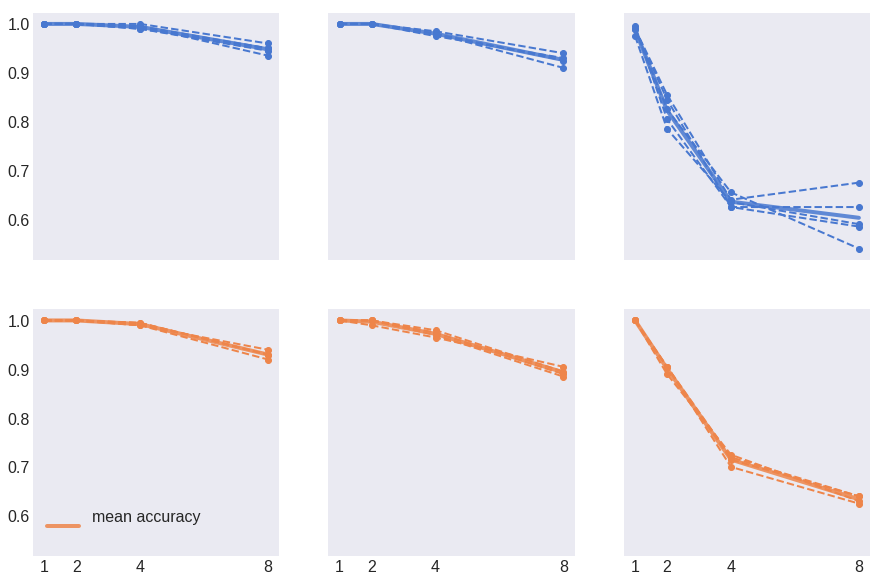

In [18]:
save_as = '../../static/fig2/from-ipynb.png'

figsize=(15,10)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

train_type = 'finetune'
for row, net_name in enumerate(['alexnet', 'VGG16']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if row==1 and col==0:
                add_legend=True
            else:
                add_legend=False

            if net_name == 'alexnet':
                both_color = pal[0]
                mn_both_color = pal[0]
            elif net_name == 'VGG16':
                both_color = pal[1]
                mn_both_color = pal[1]
                
            searchnets.plot.metric_v_set_size_df(df=atft_df, net_name=net_name,
                                                 train_type=train_type, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 both_color=both_color,
                                                 mn_both_color=mn_both_color,
                                                 set_ylim=False,
                                                 ax=ax[row, col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend,
                                                 save_as=save_as)

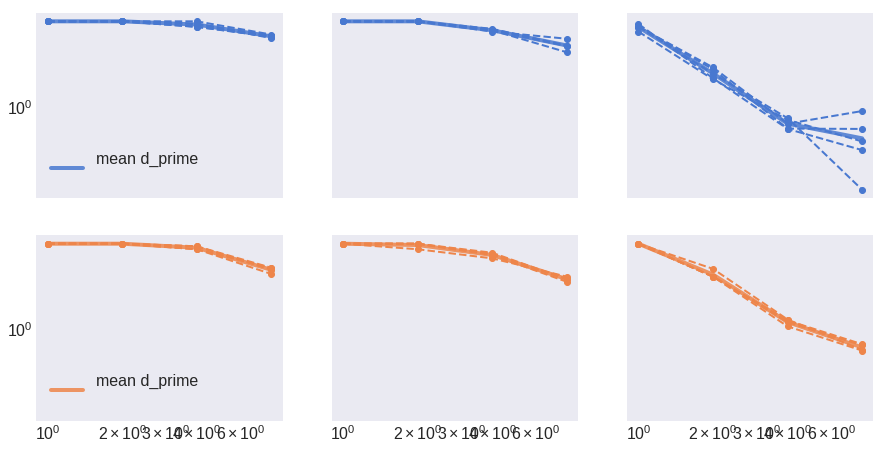

In [10]:
figsize=(15,7.5)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


train_type = 'finetune'
for row, net_name in enumerate(['alexnet', 'VGG16']):
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial configuration'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if col==0:
                add_legend=True
            else:
                add_legend=False

            if net_name == 'alexnet':
                both_color = pal[0]
                mn_both_color = pal[0]
            elif net_name == 'VGG16':
                both_color = pal[1]
                mn_both_color = pal[1]
                
            searchnets.plot.metric_v_set_size_df(df=atft_df, net_name=net_name,
                                                 train_type=train_type, 
                                                 stimulus=stim_abbrev,
                                                 metric='d_prime', 
                                                 conditions=['both'],
                                                 both_color=both_color,
                                                 mn_both_color=mn_both_color,
                                                 set_ylim=False,
                                                 ax=ax[row, col], 
                                                 add_legend=add_legend)
            ax[row, col].set_yscale('log')
            ax[row, col].set_xscale('log')